### Week4-2. Forward Euler 방법 프로그래밍: 함수를 이용하여 일반화

앞서 언급했듯이 Forward Euler 방법은 아래와 같은 점화식을 따른다:

$$ u^{n+1} = ru^{n}(t_{n+1}-t_n)+u^{n} = u^{n} + \Delta tru^{n}$$

Forward Euler 알고리즘은 미분방적식을 수치적으로 풀수 있는 방법에 대한 이해를 높일 수 있음을 물론이고, 이의 기하학적 의미를 직관적으로 파악할 수 있는 좋은 알고리즘이다.

하지만, 앞에서 코딩한 Forward Euler방법은 정의된 특수한 경우에서만 동작하기 때문에 좋은 코딩형태라 보기 어렵다. 따라서 좋은 알고리즘과 좋은 코딩이 동반되어야 좋은 프로그래밍이라 할 수 있다. 

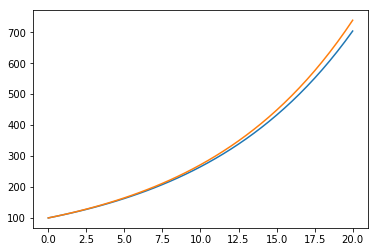

In [15]:
from numpy import linspace, zeros, exp
import matplotlib.pyplot as plt

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    u = zeros(N_t+1)
    t = linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f(u[n], t[n])
    return u, t

def demo_population_growth():
    """Test case: u'=r*u, u(0)=100. """
    def f(u, t):
        return 0.1*u
    
    u, t = ode_FE(f, U_0=100, dt=0.5, T=20)
    plt.plot(t, u, t, 100*exp(0.1*t))
    plt.show()
if __name__ == '__main__':
    demo_population_growth()

더 나아가, 함수의 개수가 늘어나면 함수를 모아두는 CLASS의 개념을 도입하여 더 일반화된 코딩을 하는 것이 좋은 프로그래밍이다. 

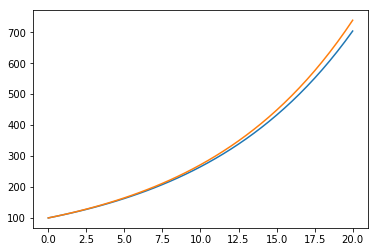

In [16]:
from numpy import linspace, zeros, exp
import matplotlib.pyplot as plt

class ODE:
    def ode_FE(f, U_0, dt, T):
        N_t = int(round(float(T)/dt))
        u = zeros(N_t+1)
        t = linspace(0, N_t*dt, len(u))
        u[0] = U_0
        for n in range(N_t):
            u[n+1] = u[n] + dt*f(u[n], t[n])
        return u, t
    def f(u, t):
        return 0.1*u
    
def demo_population_growth():
    """Test case: u'=r*u, u(0)=100. """
  
    u, t = ODE.ode_FE(f=ODE.f, U_0=100, dt=0.5, T=20)
    plt.plot(t, u, t, 100*exp(0.1*t))
    plt.show()
    
if __name__ == '__main__':
    demo_population_growth()

우리는 지금까지 아래 미분방정식을 Forward Euler 방법을 통하여 풀어보았다.

$$ u'(t) = f(u,t), \qquad u = U_0, t \in [0,T], $$

주어진 함수 $f$와 초기값 $U_0$, 그리고 정의역 $T$를 $\Delta t$의 간격으로 쪼갠 후 $N_t+1$개의 array를 업데이트 하여, $u^0, u^1, \ldots , u^{N_t}$값을 찾는 아래 점화식을 풀었다.


$$ u^{n+1} = u^{n} + \Delta tf(u^{n},t_n), \qquad n = 0, \ldots, N_{t}-1$$